## Q4: Bootstraps

Boostrapping is a prominent statistical tecnique to estimate errors when you're stuck and don't know what else to o: https://erikjanvankesteren.nl/blog/2018-03-01-baron-bootstrap.html

Generate a 1D array (say from a Gaussian, but then add some outliers for fun). Compute the bootstrapped 95% confidence intervals for the mean of that array (i.e., resample the elements of an array with replacement N times, compute the mean of each sample, and then compute percentiles over the means). 

Boostrapped 5-95% CI of mean: 3.69, 4.10


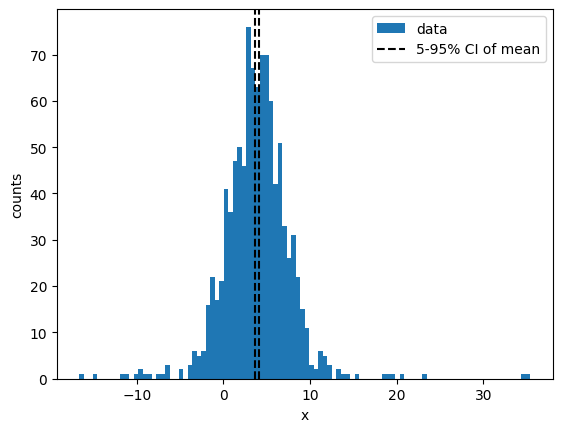

In [24]:
import numpy as np
import matplotlib.pyplot as plt

mu = 4
sigma = 3
N_data = 1000
N_outliers = 50
N_bootstrap = 10000

data = np.random.normal(mu, sigma, N_data - N_outliers)
data = np.append(data, np.random.normal(mu, 4*sigma, N_outliers))
means = np.array([np.mean(np.random.choice(data, N_data)) for _ in range(N_bootstrap)])
lo, hi = np.percentile(means, (5, 95))

print(f"Boostrapped 5-95% CI of mean: {lo:0.2f}, {hi:0.2f}")
plt.hist(data, bins=100, label="data")
plt.axvline(lo, c = "black", ls="--")
plt.axvline(hi, c = "black", ls="--", label="5-95% CI of mean")
plt.xlabel("x")
plt.ylabel("counts")
plt.legend();

## Q5: Einstein summation

einsum is a powerful (but often painful) numpy thing:
- https://numpy.org/doc/stable/reference/generated/numpy.einsum.html
- https://stackoverflow.com/questions/26089893/understanding-numpys-einsum

Take 2 vectors A and B. Write the einsum equivalent of inner, outer, sum, and mul function.

In [12]:
A, B = np.random.rand(2, 10)
print("Sum comparison:", np.allclose(np.einsum("ij->", [A, B]), np.sum(np.append(A, B))))
print("Inner product comparison:", np.allclose(np.einsum("i,i->", A, B), np.inner(A, B)))
print("Outer product comparison:", np.allclose(np.einsum("i,j->ij", A, B), np.outer(A, B)))
print("Element-wise product comparison:", np.allclose(np.einsum("i,i->i", A, B), np.multiply(A, B)))

A, B = np.random.rand(2, 10, 10)
print("Matrix product comparison:", np.allclose(np.einsum("ij,jk->ik", A, B), np.matmul(A, B)))

Sum comparison: True
Inner product comparison: True
Outer product comparison: True
Element-wise product comparison: True
Matrix product comparison: True
